# CS4681 - Advanced Machine Learning
## Programming Assignment

In [4]:
import torch

from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

import torch.nn as nn

from torch import optim
from torch.autograd import Variable

In [5]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
custom_MNIST_path = '/content/drive/MyDrive/CS4681 - GAN Assignment/Fake_Digits'

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

fake_data = datasets.ImageFolder(root=custom_MNIST_path, transform=transform)

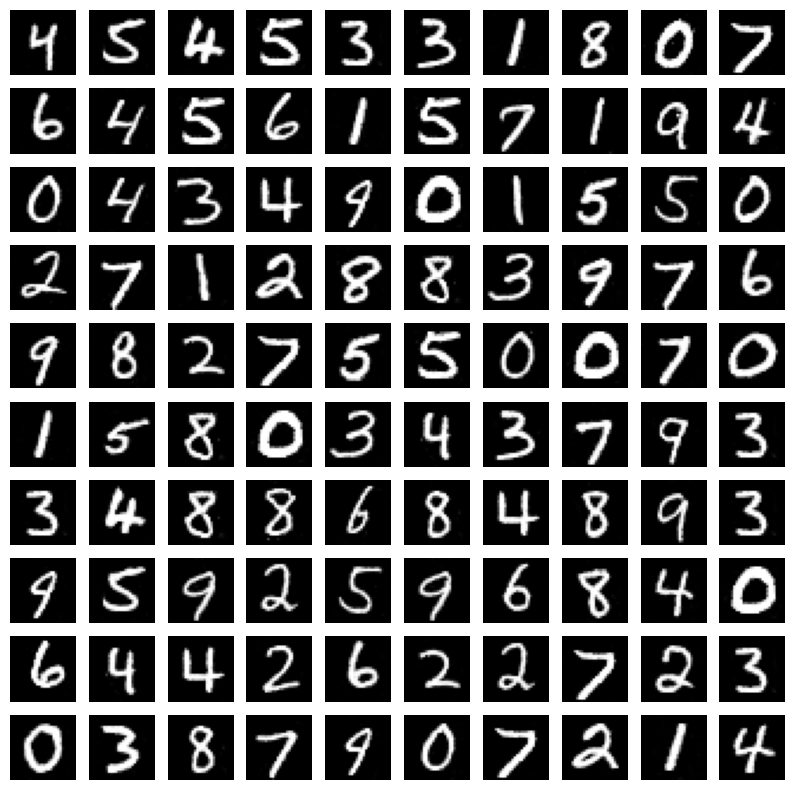

In [13]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 10, 10
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(fake_data), size=(1,)).item()
    img, label = fake_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

plt.savefig('fake_mnist_samples.png', bbox_inches='tight')
plt.show()

In [10]:
MNIST_path='./data'

train_data=datasets.MNIST(
    root=MNIST_path,
    train=True,
    transform=ToTensor(),
    download=True,
)

test_data=datasets.MNIST(
    root=MNIST_path,
    train=False,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 2714701.73it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 475909.77it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4256881.47it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2871650.40it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [2]:
print(train_data.data.size())
print(test_data.data.size())
print(len(fake_data))

NameError: name 'train_data' is not defined

In [ ]:
plt.imshow(train_data.data[10], cmap='gray')
plt.title('%i' % train_data.targets[10])
plt.show()

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(fake_data), size=(1,)).item()
    img, label = fake_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [51]:


from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'fake': torch.utils.data.DataLoader(fake_data,
                                        batch_size=100,
                                        shuffle=True,
                                        num_workers=1)
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7ef4c00b5a20>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7ef4c00b6c50>,
 'fake': <torch.utils.data.dataloader.DataLoader at 0x7ef4c00b6d70>}

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=36,  #16
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(36, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization

In [14]:
cnn=CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 36, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(36, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [15]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [16]:
optimizer = optim.Adam(cnn.parameters(), lr=0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [17]:
num_epochs = 10

def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        correct = 0
        total = 0
        train_loss = 0

        for i, (images, labels) in enumerate(loaders['train']):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            # Calculate accuracy
            _, predicted = torch.max(output, 1)  # Get the index of the max log-probability
            correct += (predicted == b_y).sum().item()  # Increment the number of correct predictions
            total += b_y.size(0)  # Increment the total number of predictions
            train_loss += loss.item()

#             if (i+1) % 100 == 0:
#                 print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

        epoch_accuracy = 100 * correct / total
        print('Epoch [{}/{}], Loss: {:.4f},  Training Accuracy: {:.2f}%'.format(epoch + 1, num_epochs, train_loss / 600, epoch_accuracy))
    pass

train(num_epochs, cnn, loaders)

Epoch [1/10], Step [100/600], Loss: 0.1228
Epoch [1/10], Step [200/600], Loss: 0.1623
Epoch [1/10], Step [300/600], Loss: 0.0600
Epoch [1/10], Step [400/600], Loss: 0.1016
Epoch [1/10], Step [500/600], Loss: 0.0237
Epoch [1/10], Step [600/600], Loss: 0.0655
Epoch [2/10], Step [100/600], Loss: 0.1217
Epoch [2/10], Step [200/600], Loss: 0.0283
Epoch [2/10], Step [300/600], Loss: 0.0852
Epoch [2/10], Step [400/600], Loss: 0.0592
Epoch [2/10], Step [500/600], Loss: 0.0554
Epoch [2/10], Step [600/600], Loss: 0.0633
Epoch [3/10], Step [100/600], Loss: 0.0091
Epoch [3/10], Step [200/600], Loss: 0.0804
Epoch [3/10], Step [300/600], Loss: 0.0017
Epoch [3/10], Step [400/600], Loss: 0.0409
Epoch [3/10], Step [500/600], Loss: 0.0735
Epoch [3/10], Step [600/600], Loss: 0.1098
Epoch [4/10], Step [100/600], Loss: 0.0511
Epoch [4/10], Step [200/600], Loss: 0.0203
Epoch [4/10], Step [300/600], Loss: 0.0914
Epoch [4/10], Step [400/600], Loss: 0.1096
Epoch [4/10], Step [500/600], Loss: 0.0502
Epoch [4/10

In [20]:
import pickle

with open('/content/C.pkl', 'wb') as f:
    pickle.dump(cnn, f)

In [ ]:
def test_all():
  cnn.eval()
  with torch.no_grad():
    correct=0
    total=0
    for images, labels in loaders['test']:
      test_output,last_layer=cnn(images)
      pred_y=torch.max(test_output,1)[1].data.squeeze()
      accuracy=(pred_y==labels).sum().item()/float(labels.size(0))
      pass
    print('Test Acc %.2f' % accuracy)
    pass


test_all()

Test Acc for original MNIST  1.00


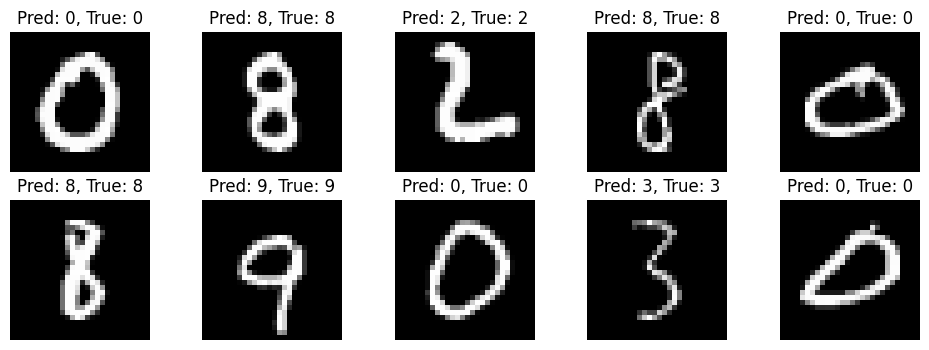

In [29]:
def test_original_mnist():
  cnn.eval()
  with torch.no_grad():
    correct=0
    total=0
    images, labels = next(iter(loaders['test']))
    test_output,last_layer=cnn(images)
    pred_y=torch.max(test_output,1)[1].data.squeeze()
    accuracy=(pred_y==labels).sum().item()/float(labels.size(0))
    error_rate = 1 - accuracy

    print('Test Acc for original MNIST  %.2f' % accuracy)
    print('Error Rate for original MNIST  %.2f' % error_rate)

    # Plot the images along with their predicted labels
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):  # Show up to 10 images
        plt.subplot(10, 10, i + 1)  # Create a subplot grid
        plt.imshow(images[i].squeeze(), cmap='gray')  # Display image (remove channel dimension if needed)
        plt.title(f'Pred: {pred_y[i].item()}, True: {labels[i].item()}')  # Display predicted and true labels
        plt.axis('off')  # Hide axes

test_original_mnist()

torch.Size([100, 1, 28, 28])
tensor([6, 6, 2, 1, 5, 4, 2, 7, 1, 4, 7, 0, 1, 8, 2, 2, 8, 6, 1, 3, 5, 4, 0, 5,
        2, 0, 3, 9, 7, 4, 4, 6, 6, 2, 4, 3, 5, 4, 5, 5, 8, 9, 0, 0, 5, 6, 3, 1,
        9, 5, 0, 5, 8, 3, 4, 9, 6, 1, 6, 8, 2, 6, 1, 8, 2, 6, 7, 7, 1, 9, 3, 3,
        7, 9, 9, 8, 3, 4, 7, 9, 8, 7, 7, 1, 0, 3, 8, 4, 2, 9, 0, 2, 5, 7, 8, 0,
        3, 0, 9, 1])
tensor([6, 6, 2, 1, 5, 4, 2, 7, 1, 4, 7, 0, 1, 8, 2, 2, 8, 6, 1, 3, 5, 4, 0, 5,
        2, 0, 3, 9, 7, 4, 4, 6, 6, 2, 4, 3, 5, 4, 5, 5, 8, 9, 0, 0, 5, 6, 3, 1,
        9, 5, 0, 5, 8, 3, 4, 9, 6, 1, 6, 8, 2, 6, 1, 8, 2, 6, 7, 7, 1, 9, 3, 3,
        7, 9, 9, 8, 3, 4, 7, 9, 8, 7, 7, 1, 0, 3, 8, 4, 2, 9, 0, 2, 5, 7, 8, 0,
        3, 0, 9, 1])
Test Acc for fake MNIST  1.00


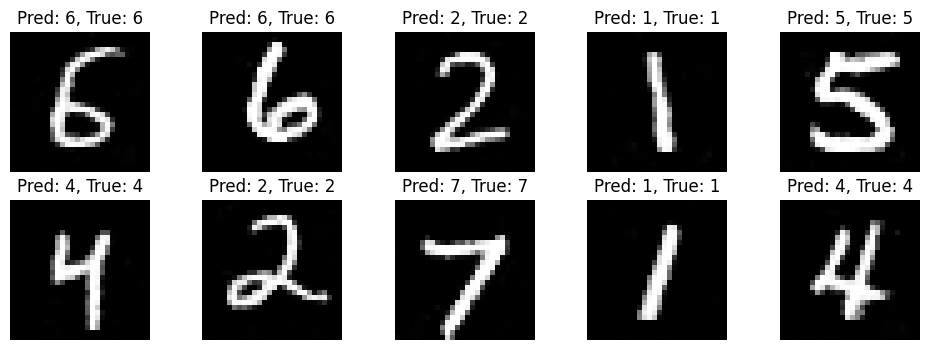

In [52]:
def test_fake_mnist():
  cnn.eval()
  with torch.no_grad():
    correct=0
    total=0
    images, labels = next(iter(loaders['fake']))

    test_output,last_layer=cnn(images)
    pred_y=torch.max(test_output,1)[1].data.squeeze()
    accuracy=(pred_y==labels).sum().item()/float(labels.size(0))
    error_rate = 1 - accuracy

    print('Test Acc for fake MNIST  %.2f' % accuracy)
    print('Error Rate for fake MNIST  %.2f' % error_rate)

test_fake_mnist()

In [53]:
from collections import Counter

def check_predictions_distribution(loader):
    cnn.eval()
    with torch.no_grad():
        all_preds = []
        for images, _ in loader:
            test_output, _ = cnn(images)
            preds = torch.max(test_output, 1)[1].detach().cpu().numpy()
            all_preds.extend(preds)

        class_counts = Counter(all_preds)
        for class_id, count in class_counts.items():
            print(f'Predicted Class {class_id}: {count} samples')

check_predictions_distribution(loaders['fake'])

Predicted Class 0: 10 samples
Predicted Class 4: 10 samples
Predicted Class 9: 10 samples
Predicted Class 6: 10 samples
Predicted Class 1: 10 samples
Predicted Class 7: 10 samples
Predicted Class 2: 10 samples
Predicted Class 3: 10 samples
Predicted Class 8: 10 samples
Predicted Class 5: 10 samples


In [23]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:100].numpy()

In [ ]:
test_output,last_layer=cnn(imgs[:100])
pred_y=torch.max(test_output,1)[1].data.numpy().squeeze()

print(f'Prediction number {pred_y}')
print(f'Actual number {actual_number}')

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm=confusion_matrix(actual_number, pred_y)

In [ ]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, [str(i) for i in range(0,9)])

In [ ]:
!sudo pip install graphviz
!sudo pip install torchviz

In [ ]:
from torchviz import make_dot

make_dot (cnn(imgs[:1]), params=dict(cnn.named_parameters()))